# Bayesian Statistics

## Intro

1. What is Bayesian Statistic?

    1.1 The Bayes "formula"

2. Bayesian Data Analysis

3. The locomotive problem

4. Bayesian hypotheses comparison

5. Bayesian Inference

6. Probabilistic Programming

    6.1 Model specification
    
    6.2 Model fitting
    
    6.3 Posterior analysis

# 1. What is Bayesian Statistics?

> Bayesian statistics is a theory in the field of statistics based on the **Bayesian interpretation of probability** where probability expresses a degree of belief in an event. 
> The degree of belief may be based on prior knowledge about the event, such as the results of previous experiments, or on personal beliefs about the event. 
> This differs from a number of other interpretations of probability, such as the frequentist interpretation that views probability as the limit of the relative frequency of an event after many trials. 

>(Source: *Wikipedia*) 

## 1.1 The Bayes "formula"

Bayes' theorem is a fundamental theorem in Bayesian statistics. 

$$ P(H | E) = \frac{P(E | H)P(H)}{P(E)}$$

Bayes' formula can be used in frequentist statistics for computing **conditional probabilities**, but in Bayesian statistics is used to compute **posterior probabilities** (as opposed to **prior probabilities**), given observations. 

> For example, a patient is observed to have a certain symptom ($E$), and Bayes' formula can be used to compute the probability that a diagnosis ($H$) is correct, given that observation. 

Bayesian statistics **interprets probabilities as measures of believability** (how confident we are) in an event, **not as the long-run frequency of events**.

Beliefs mesaures are applied to individuals, not to nature, so there is room for conflicting belives among individuals. Different beliefs are not intepreted as errors but as **different states of knowledge about an event**. 

The formula is interpreted as an **updating of belief after observing data**.

#### A note about Bayesian subjectivity

> Bayesian methods are often characterized as “subjective” because the user must choose a prior distribution, that is, a mathematical expression of prior information. 

> The prior distribution requires information and user input, that’s for sure, but I don’t see this as being any more “subjective” than other aspects of a statistical procedure, such as the choice of model for the data (for example, logistic regression) or the choice of which variables to include in a prediction, the choice of which coefficients should vary over time or across situations, the choice of statistical test, and so forth. 

> Indeed, Bayesian methods can in many ways be more “objective” than conventional approaches in that Bayesian inference, with its smoothing and partial pooling, is well adapted to including diverse sources of information and thus can reduce the number of data coding or data exclusion choice points in an analysis. 

> *Andrew Gelman, Professor of statistics and political science and director of the Applied Statistics Center at Columbia University*. 



# 2. Bayesian Data Analysis

Let's now imagine the following scenario: We want to know the *probability* of getting the Oscar for the last film an actor has starred. 

In this case, the *frequentist* notion of **series of trials** is not well defined: every year the situation is different, there are no series of identical trials to consider. We can conclude that the classical notion of probability does not apply to this situations.

But **Bayesianism** defines probability in a different way: **the degree of belief that an event will occur**.

What is the probability that Bin Laden is dead? For a frequentist there is no probability for this event because there are no possible trials (Bin Laden is dead or is not, it's not a question of probability). A Bayesianist would assign a probability to this event based on her **state of knowledge**. The state of knowledge changes when new information is available. 

### The Bayes rule

The main tool of Bayesian Analysis is the Bayes theorem, presented in 1763:

**Bayes Theorem**  

$$ P(A | B) = \frac{P(B | A)P(A)}{P(B)} $$

This theorem describes the relationship between the conditional probabilities of two events.

It is easy to show that this is true. It's only basic arithmetic based on probability rules (chain rule):

+ We know that $ P(A \text{ and } B) = P(A)P(B | A) $.
+ But it also true that $ P(A \text{ and } B) = P(B)P(A | B)$.
+ So, $ P(A)P(B | A) = P(B)P(A | B)$.


Although this is called Bayes’ theorem, the **general form** of it as stated here was actually first written down not by Thomas Bayes, but by Pierre-Simon Laplace. What Bayes did was derive the special case of this formula for “inverting” the binomial distribution. 

### Hypotheses and evidences.

The most common interpretation of Bayes's Theorem is based in considering that $A$ is an hypothesis $H$ and $B$ a new evidence $E$ that should modify our belief in $H$:

$$P(H | E) = P(H) \frac{P(E|H)}{P(E)}$$

This is called the **diachronic interpretation** because it describes how *an hypothesis must be updated over time every time a new evidence is found*. 


+ $P(H | E)$ is called the **posterior**.
+ $P(H)$ is called the **prior probability** of the hypothesis.
+ $P(E | H)$ is called the **likelihood** of the evidence.
+ $P(E)$ is a normalizing constant. If there are $n$ hypotheses that are *mutually exclusive* and *collectivelly exahustive*, we can compute $P(E)$ as:

$$ P(E) = P(H_1)P(E|H_1) + \dots + P(H_n)P(E|H_n)$$


In general, $P(H | E), P(H), P(E|H), P(E)$ are functions! 

We can extract point estimates, set estimates and probabilistic propositions from $P(H | E)$.

### Example: Visualization of the Bayes Rule

Let's suppose we are living in a pandemic. Say $ P(H_{\text{yes}}) = 5\% $  is the **prevalence** of the disease and that each individual of the population is given a test with accuracy $ P(E_{\text{yes}}|H_{\text{yes}}) = P(E_{\text{no}}|H_{\text{no}}) = 90\% $

We want to know the **probability of having the disease if you tested positive**: 
$ Pr(H_{\text{yes}}|E_{\text{yes}}) $

We can use Bayes' rule to compute this posterior:

$$ P(H_{\text{yes}}|E_{\text{yes}}) = \frac{P(H_{\text{yes}}) P(E_{\text{yes}}|H_{\text{yes}}) }{P(E_{\text{yes}})} = $$

$$ = \frac{P(H_{\text{yes}}) P(E_{\text{yes}}|H_{\text{yes}}) }{P(H_{\text{yes}}) P(E_{\text{yes}}|H_{\text{yes}}) + P(H_{\text{no}}) P(E_{\text{yes}}|H_{\text{no}})} $$

That is,

$$ = \frac{0.05 \times 0.9}{0.05 \times 0.9 + 0.95 \times 0.1} \approx 0.32 $$

Many find it counterintuitive that this probability is much lower than $90\%$. This example helps to explain why the test accuracy doesn't directly translate to the same probability of having the disease upon testing positive.

![ChessUrl](https://raw.githubusercontent.com/simplystats/simplystats.github.io/master/_images/bayes.gif "chess")


**You need to remember that what you want to minimize is the False Negatives:**

To find the probability of having the disease but testing negative, we use the concept of the false negative rate of the test. We need to calculate:

$$ Pr(H_{\text{yes}}|E_{\text{no}}) $$

Again, applying Bayes' rule, we set it up as:

$$ P(H_{\text{yes}}|E_{\text{no}}) = \frac{P(H_{\text{yes}}) P(E_{\text{no}}|H_{\text{yes}}) }{P(E_{\text{no}})} $$

The probability $ P(E_{\text{no}}|H_{\text{yes}}) $ is the probability of a false negative, which is $ 1 - P(E_{\text{yes}}|H_{\text{yes}}) = 1 - 0.9 = 0.1 $ since the test accuracy (true positive rate) is 90%.

We need $ P(E_{\text{no}}) $, the overall probability of testing negative, calculated as:

$$ P(E_{\text{no}}) = P(H_{\text{yes}}) P(E_{\text{no}}|H_{\text{yes}}) + P(H_{\text{no}}) P(E_{\text{no}}|H_{\text{no}}) $$

Given $ P(H_{\text{no}}) = 1 - P(H_{\text{yes}}) = 0.95 $ and $ P(E_{\text{no}}|H_{\text{no}}) = 1 - P(E_{\text{yes}}|H_{\text{no}}) = 1 - 0.1 = 0.9 $:

$$ P(E_{\text{no}}) = 0.05 \times 0.1 + 0.95 \times 0.9 = 0.005 + 0.855 = 0.86 $$

So, the formula for $ P(H_{\text{yes}}|E_{\text{no}}) $ becomes:

$$ P(H_{\text{yes}}|E_{\text{no}}) = \frac{0.05 \times 0.1}{0.86} \approx 0.0058 $$

This calculation indicates that there is approximately a 0.58% chance of having the disease but testing negative, highlighting the importance of considering both the prevalence of the disease and the accuracy of the test in interpreting results.

### Example: Monty Hall Problem

> "*Let's Make a Deal*" is a television game show which originated in the United States and has since been produced in many countries throughout the world. The show is based around deals offered to members of the audience by the host. The traders usually have to weigh the possibility of an offer for valuable prizes, or undesirable items, referred to as "Zonks". 

>*Source: Wikipedia*.

Monty Hall was the original host of the game. The Monty Hall problem is based on one of the regular games of the show. It is a stick or switch problem:
+ Suppose you're on the game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats.
+ You pick a door, say Door A (the door is not open), and the host, who knows what's behind the doors, opens Door B, which has a goat.
+ He then says to you, "Do you want to pick Door C?" Is it to your advantage to switch your choice?

Most people intuitively think that it makes no difference to stick or to switch, but this is wrong!

The truth is that if you stick the probability of winning is 1/3; if you switch your chances are 2/3.

We can use the Bayesian point of view to solve this problem. At the beginning, there are different hypotheses $H$ with their corresponding **prior** probabilities:

+ A: the car is behind Door A; $P(H='A') = 1/3$
+ B: the car is behind Door B; $P(H='B') = 1/3$
+ C: the car is behind Door C; $P(H='C') = 1/3$

You choose A randomly. If you stick to A after Monty opens the door B (this our evidence *E*). We can compute $P(H='A'|E)$:

$$ P(H='A'|E) = \frac{P(H='A')P(E|H='A')}{P(E)} $$
$$ = \frac{1/3 \times 1/2}{1/3 \times 1/2 + 1/3 \times 0 + 1/3 \times 1} = 1/3 $$

The denominator can be understood in this way: We are assuming we initially chose A. It follows that if the car is behind A, Monty will show us a goat behind B half the time. If the car is behind B, Monty never shows us a goat behind B. Finally, if the car is behind C, Monty shows us a goat behind B every time.

**What is the probability if we switch?**

To know $P(H='C'|E)$ you could also apply Bayes's Theorem directly, but there is a simpler way to compute it: Since the probability that it's behind A is 1/3 and the sum of the two probabilities must equal 1, the probability the car is behind C is $1 - 1/3 = 2/3$.

Samuel Arbesman, Wired, 11.26.14:

> In fact, Paul Erdős, one of the most prolific and foremost mathematicians involved in probability, when initially told of the Monty Hall problem also fell victim to not understanding why opening a door should make any difference. Even when given the mathematical explanation multiple times, he wasn’t really convinced. It took several days before he finally understood the correct solution.


Let's make a **simulation** of the game to compute $P(H='C'|E)$:

In [1]:
import random

iterations = 100000
doors = ["goat"] * 2 + ["car"]
change_wins = 0
change_loses = 0

for i in range(iterations):
    random.shuffle(doors)
    
    # you pick door n:
    n = random.randrange(3)
    
    # monty picks door k, k!=n and doors[k]!="car"
    sequence = list(range(3))
    random.shuffle(sequence)
    for k in sequence:
        if k == n or doors[k] == "car":
            continue
        else:
            break
    
    # now if you change, you lose iff doors[n]=="car"
    if doors[n] == "car":
        change_loses += 1
    else:
        change_wins += 1

perc = (100.0 * change_wins) / (change_wins + change_loses)
print("Switching has %s wins and %s losses: you win %.1f%% of the time" % (change_wins, change_loses, perc))

Switching has 66913 wins and 33087 losses: you win 66.9% of the time


### Exercise: Bayes Rule

Compute $P(H='C'|E)$ by applying Bayes' Rule and check the result.

In [2]:
# your solution here

P = 0
print(P)

0


### Exercise: Clinical Test

**What is the evidence of a disease after a clinical test?**

Data:

+ 1% of women at age forty who participate in routine screening have breast cancer. 
+ 80% of women with breast cancer will get positive mammographies. 
+ 9.6% of women without breast cancer will also get positive mammographies. 

A woman in this age group had a positive mammography in a routine screening.

- **What is the probability that she actually has breast cancer?**

- **Is this a "good" test for detecting breast cancer?**

This simple puzzle is not all that simple in practice. Only 15% of doctors, when presented with this situation, come up with the correct answer.

The data:

+ $P(\text{cancer}) = 0.01$ and $P(\text{no cancer}) = 0.99$.
+ If you get $+$, then $P(+ | \text{cancer}) = 0.8$ and $P(+ | \text{no cancer}) = 0.096$.
+ If you get $-$, then $P(- | \text{cancer}) = 0.2$ and $P(- | \text{no cancer}) = 0.904$.

Let's give an answer to the second question. The answer can be given by comparing $P(\text{cancer }| +)$ and $P(\text{no cancer }| +)$:

$$ P(\text{cancer }| +) \propto P(\text{cancer}) P(+ | \text{cancer}) = 0.008 $$

$$ P(\text{no cancer }| +) \propto P(\text{no cancer}) P(+ | \text{no cancer}) = 0.09504 $$

Obviously, this is not a good test!


**What is the probability that she actually has breast cancer?** Remember that:

$$P(E) = \sum_i P(H_i) p (E | H_i)$$

In [3]:
# Your solution here.

### Exercise: Second clinical test
Let's suppose that the result of a second test for a given woman *is independent* from the first one (this is clearly a wrong assumption in the real world, but let's pretend it is true!). **What is the probability of cancer after a positive in a second test?**

In [4]:
# Your solution here.

P2 = 0
print(P2)

0


## 3. The locomotive problem

The locomotive problem

A railroad company numbers its locomotives in order $1 \dots N$. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad company has.

> During World War II, the *Economic Warfare Division* of the American Embassy in London used statistical analysis to estimate German production of tanks and other equipment.
The Western Allies had captured log books, inventories, and repair records that included chassis and engine serial numbers for individual tanks.

> Analysis of these records indicated that serial numbers were allocated by manufacturer and tank type in blocks of 100 numbers, that numbers in each block were used sequentially, and that not all numbers in each block were used. So the problem of estimating German tank production could be reduced, within each block of 100 numbers, to a form of the locomotive problem.

> Based on this insight, American and British analysts produced estimates substantially lower than estimates from other forms of intelligence. And after the war, records indicated that they were substantially more accurate.

> *(Source: http://greenteapress.com/thinkbayes/html/thinkbayes004.html#toc24)*

Based on the observation, we know the railroad has 60 or more locomotives. But how many more? 

To apply Bayesian reasoning, we can break this problem into two steps:

+ What did we know about $N$ before we saw the data?
+ For any given value of $N$, what is the likelihood of seeing the data (a locomotive with number 60)?

The answer to the first question is the **prior**, $P(H)$. The answer to the second is the **likelihood**, $P(E|H)$.

We don’t have much basis to choose a prior, but we can start with something simple and then consider alternatives. Let’s assume that $N$ can be any value from 1 to 1000 and a flat prior.

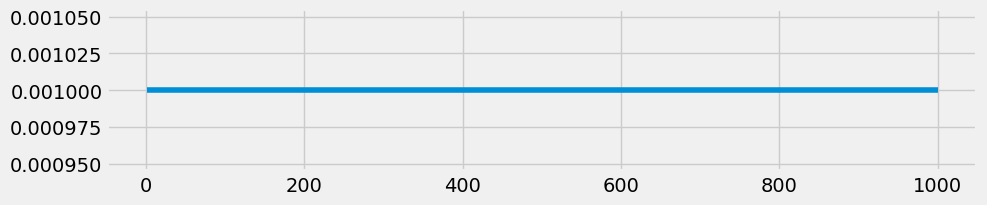

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

hypos = np.array(range(1, 1001))
priors = np.array([1.0/len(hypos) for hypo in hypos])

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.plot(hypos, priors)
plt.show()

Now all we need is a **likelihood function**, $P(E|H)$. 

In a hypothetical fleet of $N$ locomotives, what is the probability that we would see number 60? 

If we assume that there is only one train-operating company (or only one we care about) and that we are equally likely to see any of its locomotives, then the chance of seeing any particular locomotive is $1/N$ and that there are at least $N$ locomotives.

In [6]:
def Likelihood(data, hypo):
    if hypo < data:
        return 0.0
    else:
        return 1.0/hypo

Let's plug our data into the model:

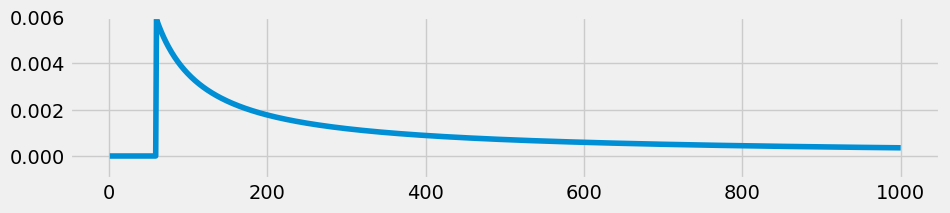

In [7]:
def Posterior(data, hypos, priors):
    import numpy as np
    posterior = np.array([Likelihood(data, hypo) for hypo in hypos]) * priors
    return posterior

# After an update, the distribution is no longer normalized, 
# but because these hypotheses are mutually exclusive and 
# collectively exhaustive, we can renormalize.

def Normalize(d):
    total = d.sum()
    factor = 1.0 / total
    for i in range(len(d)):
        d[i] *= factor
    return d

posterior = Normalize(Posterior(60, hypos, priors))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.ylim([-0.001,0.006])
    plt.plot(hypos, posterior)
plt.show()

The most likely value, if you had to guess, is 60. That might not seem like a very good guess; after all, what are the chances that you just happened to see the train with the highest number?

Nevertheless, if you want to maximize the chance of getting the answer exactly right, you should guess 60.

But maybe that’s not the right goal. An alternative is to compute the Bayes estimate, the **hypothesys that corresponds to the mean value of the posterior distribution**: 

$\hat H (E) = \mathbb{E}[H | E] = \int H p(H | E) dH$

In [8]:
def Meanp(hypos, posterior):
    total = 0.0
    s = hypos * posterior
    return s.mean()*len(hypos)

print(int(Meanp(hypos, posterior)))

333


If we want to increse our knowledge, there are two ways to proceed:

+ Get more data.
+ Get more background information.

For example, suppose that in addition to train 60 we also see trains 30 and 90. 

164


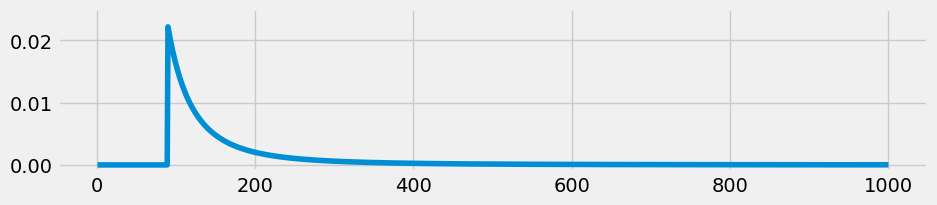

In [9]:
hypos = range(1, 1001)
posterior =  Normalize(Posterior(60, hypos, priors))
posterior2 = Normalize(Posterior(30, hypos, posterior))
posterior3 = Normalize(Posterior(90, hypos, posterior2))

print(int(Meanp(hypos, posterior3)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.ylim([-0.001,0.025])
    plt.plot(hypos, posterior3)
plt.show()

We can refactor our functions in the following way:

Mean of the posterior distribution with 1000 hypotheses:  164


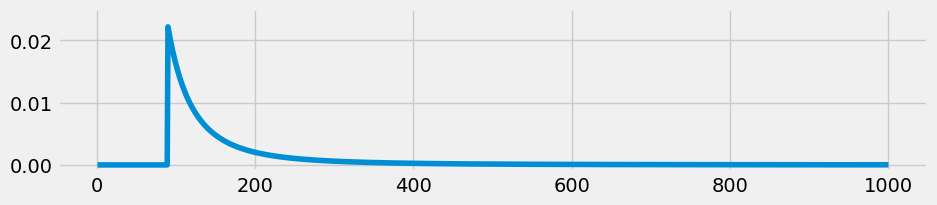

In [10]:
def Normalize(d):
    total = d.sum()
    factor = 1.0 / total
    for i in range(len(d)):
        d[i] *= factor
    return d

def Likelihood1(datum, hypo):
    if hypo < datum:
        return 0.0
    else:
        return 1.0/hypo
    
def Posterior(datum, hypos, priors, likelihood):
    import numpy as np
    posterior = np.array([likelihood(datum, hypo) for hypo in hypos]) * priors
    return posterior

def Posterior_n(data, hypos, priors, likelihood):
    p = priors
    for d in data:
        posterior =  Normalize(Posterior(d, hypos, p, likelihood))
        p = posterior
    return posterior

def Meanp(hypos, posterior):
    total = 0.0
    s = hypos * posterior
    return s.mean()*len(hypos)

hypos = np.array(range(1, 1001))
priors = np.array([1.0/len(hypos) for hypo in hypos])
posteriors = Posterior_n([60,30,90], hypos, priors, Likelihood1)

print('Mean of the posterior distribution with 1000 hypotheses: ', \
        int(Meanp(hypos, posteriors)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.ylim([-0.001,0.025])
    plt.plot(hypos, posteriors)
plt.show()

With more data, **posterior distributions based on different priors tend to converge**. 

In [11]:
hypos = np.array(range(1, 501))
priors = np.array([1.0/len(hypos) for hypo in hypos])
posteriors = Posterior_n([60,60,90], hypos, priors, Likelihood1)
print('Mean of the posterior distribution with 500 hypotheses: ', 
      int(Meanp(hypos, posteriors)))

hypos = np.array(range(1, 2001))
priors = np.array([1.0/len(hypos) for hypo in hypos])
posteriors = Posterior_n([60,60,90], hypos, priors, Likelihood1)
print('Mean of the posterior distribution with 2000 hypotheses: ', 
      int(Meanp(hypos, posteriors)))

Mean of the posterior distribution with 500 hypotheses:  151
Mean of the posterior distribution with 2000 hypotheses:  171


If more data are not available, another option is to improve the priors by gathering more background information. It is probably not reasonable to assume that a train-operating company with 1000 locomotives is just as likely as a company with only 1.

Let's suppose that the distribution of the total number of locomotives of a company tends to follow a **power law**. 

This law suggests that if there are 1000 companies with fewer than 10 locomotives, there might be 100 companies with 100 locomotives, 10 companies with 1000, and possibly one company with 10,000 locomotives.

Mathematically, a power law means that the number of companies with a given size is inversely proportional to size:

$$ f(x) = \left( \frac{1}{x} \right)^\alpha $$

where $f(x)$ is the probability mass function of $x$ and $\alpha$ is a parameter (that is often near 1).

133


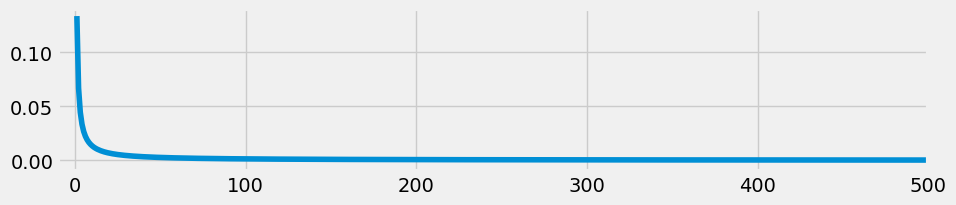

In [12]:
def Likelihood2(data, hypo, alpha=1.0):
    if hypo < data:
        return 0.0
    else:
        return hypo**(-alpha)

alpha = 1.0
hypos = np.array(range(1, 1001))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))

print(int(Meanp(hypos, priors)))
    
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.ylim([-0.01,0.14])
    plt.xlim([-10,500])
    plt.plot(hypos, priors)
plt.show()

Mean of the posterior distribution with 1000 hypotheses:  133


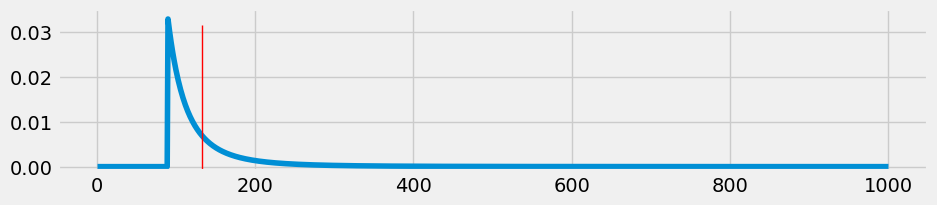

In [13]:
alpha = 1.0

hypos = np.array(range(1, 1001))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))

posteriors = Posterior_n([30,60,90], hypos, priors, Likelihood2)

print('Mean of the posterior distribution with 1000 hypotheses: ', int(Meanp(hypos, posteriors)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.ylim([-0.001,0.035])
    plt.plot(hypos, posteriors)
    plt.axvline(x=int(Meanp(hypos, posteriors)), ymin=0.0, ymax = 0.9, \
                linewidth=1, color='r')

plt.show()

Mean of the posterior distribution with 500 hypotheses:  130


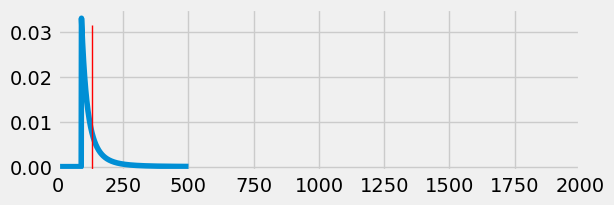

Mean of the posterior distribution with 2000 hypotheses:  133


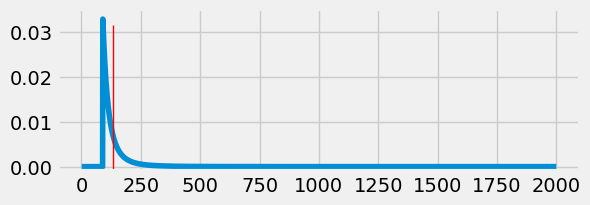

In [14]:
hypos = np.array(range(1, 501))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))

posteriors = Posterior_n([30,60,90], hypos, priors, Likelihood2)

print('Mean of the posterior distribution with 500 hypotheses: ',int(Meanp(hypos, posteriors)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.ylim([-0.001,0.035])
    plt.xlim([0,2000])
    plt.plot(hypos, posteriors)
    plt.axvline(x=int(Meanp(hypos, posteriors)), ymin=0.0, ymax = 0.9, \
                linewidth=1, color='r')

plt.show()

hypos = np.array(range(1, 2001))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))

posteriors = Posterior_n([30,60,90], hypos, priors, Likelihood2)

print('Mean of the posterior distribution with 2000 hypotheses: ',int(Meanp(hypos, posteriors)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.ylim([-0.001,0.035])
    plt.plot(hypos, posteriors)
    plt.axvline(x=int(Meanp(hypos, posteriors)), ymin=0.0, ymax = 0.9, \
                linewidth=1, color='r')

plt.show()

#### MAP and credible intervals

Once we have the **posterior distribution** we could be interested in summarizing the result with a **point estimate** or a **credible interval**.

For point estimates we can use, the mean, the median or the **mode**. This last estimate is called **maximum a posteriori estimate (MAP)**.

For intervals we usually report two values computed so that there is a 95% chance that the unknown value falls between them (or any other probability). These values define a **credible interval**.

A simple way to compute the 95% credible interval is to add up the probabilities in the posterior distribution and record the values that correspond to probabilities 2.5% and 97.5%. In other words, the 2.5th and 97.5th percentiles.

The credible interval is [ 90 , 303 ]


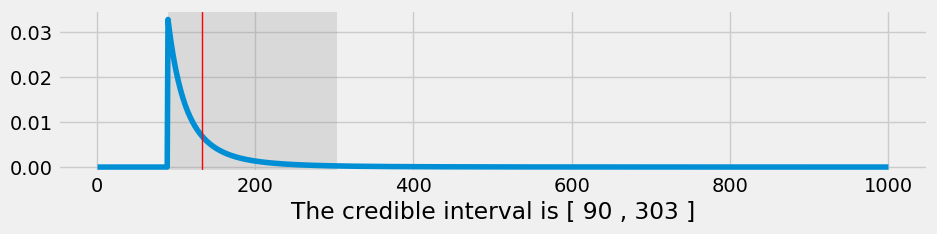

In [15]:
def Percentile(hypos, posterior, percentage):
    import numpy as np
    p = percentage / 100.0
    cdf = np.cumsum(np.array(posterior))
    total = 0
    for i in range(len(hypos)):
        total += posterior[i]
        if total >= p:
            return hypos[i] 

alpha = 1.0

hypos = np.array(range(1, 1001))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))
posteriors = Posterior_n([30,60,90], hypos, priors, Likelihood2)      

print('The credible interval is [', Percentile(hypos, posteriors, 2.5),',', \
            Percentile(hypos, posteriors, 97.5), ']')

with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(10,2))
    ax = fig.add_subplot(111)
    plt.ylim([-0.001,0.035])
    plt.plot(hypos, posteriors)
    plt.axvspan(Percentile(hypos, posteriors, 2.5), Percentile(hypos, posteriors, 97.5), facecolor='0.5', alpha=0.2)
    plt.axvline(x=int(Meanp(hypos, posteriors)), ymin=0.0, ymax = 1, \
                linewidth=1, color='r')
    ax.set_xlabel('The credible interval is [ 90 , 303 ]')
plt.show()

For the previous example—the locomotive problem with a power law prior and three trains—the 90% credible interval is (90, 303). The width of this range suggests, correctly, that we are still quite uncertain about how many locomotives there are.

## 4. Bayesian hypotheses comparison


Bayesian hypotheses comparison

From a frequentist point of view, we say that an effect $H_A$ is statistically significant (or not) by computing the chances (likelihood) of the effect under a null hypothesis $P(E|H_0)$, but you can't conclude it is real.

From a Bayesian point of view what we directly compute $P(H_A | E)$, where $H_A$ is the hypothesis the effect is real. 

By Bayes's Theorem:

$$ P(H_A | E) = \frac{P(E|H_A) P(H_A)}{P(E)} = \frac{P(E|H_A) P(H_A)}{P(E | H_A)P(H_A) + P(E | H_0)P(H_0)} $$

To compute $P(E | H_A)$, the likelihood term, we can follow a similar approach to the one employed to compute $P(E | H_0)$, by generating 1000 sample pairs, one from each distribution.

In [16]:
import pandas as pd
import random
import numpy as np

file = open('2002FemPreg.dat', 'r')
seed = 41
np.random.seed(seed)

def chr_int(a):
    if a == '  ':
        return 0
    else:
        return int(a)
        
preg=[]
for line in file:
    lst  = [int(line[:12]), int(line[274:276]), int(line[276]), \
                 chr_int(line[277:279]), float(line[422:440])]
    preg.append(lst)
    

df = pd.DataFrame(preg)
df.columns = ['caseid', 'prglength', 'outcome', 'birthord', 'finalwgt']

#data cleaning
df2 = df.drop(df.index[(df.outcome == 1) & (df['prglength'] > df['prglength'].median() + 6)])
df2[(df2.outcome == 1) & 
    (df2['prglength'] > df2['prglength'].median() + 6)]
df3 = df2.drop(df2.index[(df2.outcome == 1) &
                         (df2['prglength'] < df2['prglength'].median() -10)])
df3[(df3.outcome == 1) & 
    (df3['prglength'] < df3['prglength'].median() - 10)]

firstbirth = df3[(df3.outcome == 1) & (df3.birthord == 1)]
othersbirth = df3[(df3.outcome == 1) & (df3.birthord >= 2)]

x = firstbirth['prglength']
y = othersbirth['prglength']
m= len(x)
n= len(y)
p = abs(x.mean() - y.mean())
N = 1000

# Compute p(E|H_0): all come from same population --> bootstrap from the total pool
pool = np.concatenate([x,y])
np.random.shuffle(pool)
diff_0 = np.zeros(shape=(N))
for i in range(N):
    p1 = [random.choice(pool) for j in range(m)]
    p2 = [random.choice(pool) for j in range(n)]
    diff_0[i] = abs(np.mean(p1)-np.mean(p2))          # two sided test

w1_0 = np.where(diff_0 > p)[0]      # counting how many differences are larger than the observed one
p_0 = len(w1_0)/float(N)
print('p(E|H_0) =', p_0, '(', p_0*100 ,'%)')

# Compute p(E|H_A): firstbirth and othersbirth come from diferent populations --> bootstrap from each group
diff_A = np.zeros(shape=(N))
for i in range(N):
    p1 = [random.choice(x.values) for j in range(m)]
    p2 = [random.choice(y.values) for j in range(n)]
    diff_A[i] = abs(np.mean(p1)-np.mean(p2))          # two sided test

w1_A = np.where(diff_A > p)[0]      # counting how many differences are larger than the observed one
p_A = len(w1_A)/float(N)
print('p(E|H_A) =', p_A, '(', p_A*100 ,'%)')

p(E|H_0) = 0.023 ( 2.3 %)
p(E|H_A) = 0.529 ( 52.900000000000006 %)


Then, the probability of $P(E | H_A)$ is around 0.5. 

In absence of knowledge we will assume that $P(H_A) = P(H_0) = 0.5$. 

Then, we can compute the posterior probabilities of $H_A$ and $H_0$:

$$ P(H_A | E) = \frac{P(E|H_A) P(H_A)}{P(E)}$$

$$ P(H_0 | E) = \frac{P(E|H_0) P(H_0)}{P(E)}$$


In [17]:
print('P(H_A|E):', 0.5 * 0.5 / (0.5 * 0.5 + 0.02 * 0.5))
print('P(H_0|E):', 0.02 * 0.5 / (0.5 * 0.5 + 0.02 * 0.5))

P(H_A|E): 0.9615384615384615
P(H_0|E): 0.038461538461538464


So, by taking into account a new evidence we have increased our belief in the effect $H_A$ from 50% to 96%. This is not a decision rule but a change in our knowledge. It makes sense: the evidence supports the hypothesis!

In our problem, based on expert knowledge, it could also make sense to consider that $P(H_A) = 0.01$ and $P(H_0) = 0.99$. In this case:

In [18]:
print('H_A:', 0.5 * 0.01 / (0.5 * 0.01 + 0.02 * 0.99))
print('H_0:', 0.02 * 0.99 / (0.5 * 0.01 + 0.02 * 0.99))

H_A: 0.20161290322580644
H_0: 0.7983870967741935


We have increased our belief in the effect $H_A$ from 1% to 20%, but we still can believe in $H_0$!

The change strongly depends on our prior belief: <br><br>

<center><small>Image from: Sellke et al. "Calibration of ρ values for testing precise null hypotheses." Am. Stat. 55.1 (2001): 62-71.</small></center>

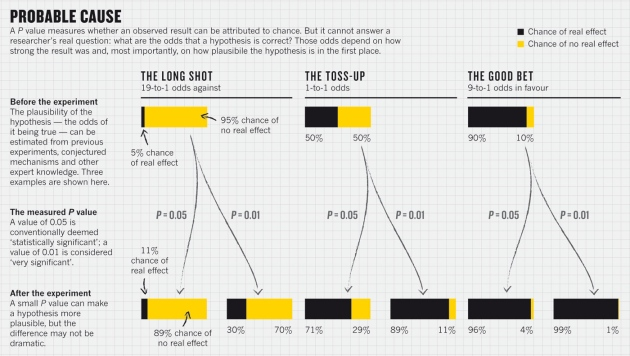

## 5. Bayesian Inference

Bayesian Inference

(from [*Bayesian Methods for Hackers, Cam Davidson-Pilon, 2013*](https://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/))

Suppose, naively, that you are unsure about the probability of heads in a coin flip. You believe there is some true underlying ratio, call it $θ \in [0,1]$, but have no prior opinion on what $θ$ might be.

We begin to flip a coin, and record the observations: either ``H`` or ``T``. This is our observed data. 

An interesting question to ask is how our inference changes as we observe more and more data? More specifically, **what do our posterior probabilities look like when we have little data, versus when we have lots of data**?

> **Assumption**: our (parametric) distributions are generative models of the world.

In probability theory and statistics, the **Bernoulli distribution**, named after Swiss scientist Jacob Bernoulli, is the probability distribution of a random variable which takes value 1 with success probability $θ$ and value 0 with failure probability $1-θ$. 

The probability distribution, over possible outcomes $k$, is:
$$P(k|θ)=θ^k (1−θ)^{1−k}$$
where $k∈\{0,1\}$ and $θ∈[0,1]$.


We can use the Bernoulli likelihood function to determine the probability of seeing a particular sequence of $N$ flips, given by the set ${k_1,...,k_N}$.

Since each of these flips is independent of any other, the probability of the sequence occuring is simply the product of the probability of each flip occuring (Binomial distribution).

If we have a particular fairness parameter $θ$, then the probability of seeing this particular stream of flips, given $θ$, is given by:

$$ P(\{k_1,...,k_N\} | θ ) =  \prod_i P(k_i|θ) = \prod_i θ^{k_i} (1−θ)^{1−k_i} $$

What about if we are interested in the number of heads, say, in $N$ flips? 

If we denote by $z$ the number of heads appearing, then the formula above becomes:

$$ P(z,N|θ) = θ^{z} (1−θ)^{N-z} $$
That is, the probability of seeing $z$ heads, in $N$ flips, assuming a fairness parameter $θ$. 

We will use this formula when we come to determine our posterior belief distribution.

#### Bayes' Rule for Bayesian Inference

$$P(θ|D)=\frac{P(D|θ)P(θ)}{P(D)}$$

Where:

+ $P(θ)$ is the prior. Our prior view on the probability of how fair the coin is.

+ $P(θ|D)$ is the posterior. 

+ $P(D|θ)$ is the likelihood. If we knew the coin was fair, this tells us the probability of seeing a number of heads in a particular number of flips.

+ $P(D)$ is the evidence. If we had multiple views of what the fairness of the coin is (but didn't know for sure), then this tells us the probability of seeing a certain sequence of flips for all possibilities of our belief in the coin's fairness.

We are interested in the probability of the coin coming up heads as a function of the underlying fairness parameter $θ$.

Regarding the likelihood: 

$$ P(D|θ) = P(z,N|θ) = θ^{z} (1−θ)^{N-z} $$

Regarding the prior, we are going to choose the beta distribution:

$$ P(θ | \alpha, \beta)=  \frac{θ^{\alpha-1} (1−θ)^{\beta -1}}{B(\alpha, \beta)}  $$ 

where the term in the denominator is present to act as a normalising constant so that the area under the PDF actually sums to 1.

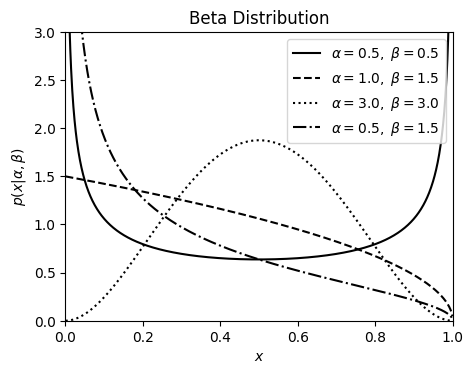

In [19]:
from scipy.stats import beta
from matplotlib import pyplot as plt
import numpy as np

#------------------------------------------------------------
# Define the distribution parameters to be plotted
alpha_values = [0.5, 1.0, 3.0, 0.5]
beta_values = [0.5, 1.5, 3.0, 1.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')

plt.legend(loc=0)
plt.show()

The most important reason for choosing a beta distribution is because it is a **conjugate prior** for the Bernoulli distribution.

In Bayes' rule above we can see that the posterior distribution is proportional to the product of the prior distribution and the likelihood function:

$$ P(θ|D) \propto P(D|θ)P(θ) $$

A **conjugate prior** is a choice of prior distribution, that when coupled with a specific type of likelihood function, provides a posterior distribution that is of the same family as the prior distribution.

> The prior and posterior both have the same probability distribution family, but with differing parameters.

If our prior is given by $beta(θ|α,β)$ and we observe $z$ heads in $N$ flips subsequently, then the posterior is given by $beta(θ|z+α,N−z+β)$.

Below we plot a sequence of updating posterior probabilities as we observe increasing amounts of data (coin flips).

In [20]:
import matplotlib.pylab as plt
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
figsize(10, 9)

# we use a (continous) prior for p by using the beta function
dist = stats.beta

n_trials = [0,1,2,3,4,5,8,15, 50, 500]

# synthetic data generation
# random number generation with a Bernoulli distribution with p=0.5
# the probability of this sequence is modelled by the binomial distribution
data = stats.bernoulli.rvs(0.5, size = n_trials[-1])
print(data)

[0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 

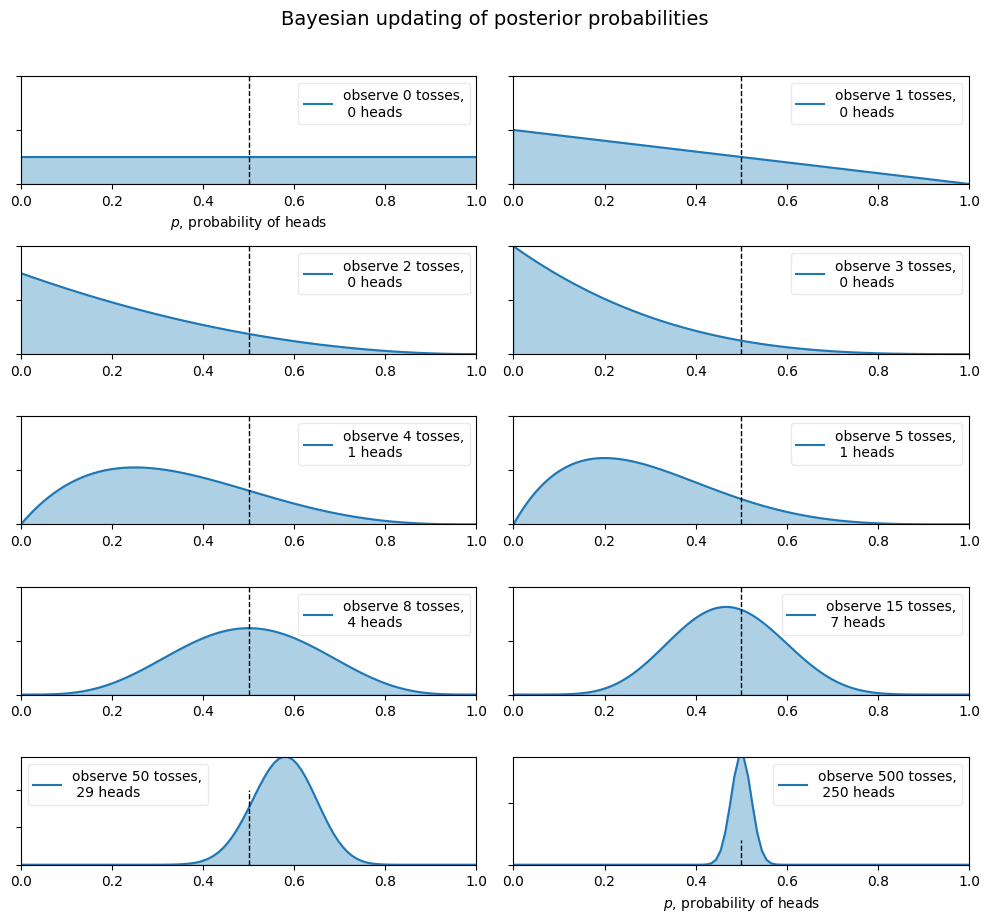

In [21]:
import warnings
warnings.filterwarnings('ignore')

x = np.linspace(0,1,100)

for k, N in enumerate(n_trials):
    sx = plt.subplot( int(len(n_trials)/2), 2, k+1)
    plt.xlabel("$p$, probability of heads") if k in [0,len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    
    # counting the number of heads
    heads = data[:N].sum()
    
    # in this case the posterior can be analitically computed
    # because the conjugate prior of the Binomial distribution
    # is a Beta distribution 
    y = dist.pdf(x, 1 + heads, 1 + N - heads )
    
    plt.plot( x, y, label= "observe %d tosses,\n %d heads"%(N,heads) )
    plt.fill_between( x, 0, y, color="#348ABD", alpha = 0.4 )
    plt.vlines( 0.5, 0, 4, color = "k", linestyles = "--", lw=1 )
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight = True)

plt.suptitle( "Bayesian updating of posterior probabilities", y = 1.02, fontsize = 14);
plt.tight_layout()


## Reminder: Popular PDF's

Popular PDF's
*(Source: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers*)

Let $Z$ be some random variable. Then associated with $Z$ is a *probability distribution function* that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome is proportional to the height of the curve.

### Discrete Case

If $Z$ is discrete, then its distribution is called a *probability mass function*, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. 

There are a lot of popular probability mass functions, but let's introduce the first very useful probability mass function. 

We say $Z$ is *Poisson*-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

It can express the **probability of a given number of events occurring in a fixed interval of time and/or space if these events occur with a known average rate and independently of the time since the last event**.

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. 

Unlike $\lambda$, which can be any positive number, the value $k$ in the above formula must be a non-negative integer, i.e., $k$ must take on values 0,1,2, and so on. This is very important, because if you wanted to model a population you could not make sense of populations with 4.25 or 5.612 members. 

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

This property is often used, so it's useful to remember. Below, we plot the probability mass distribution for different $\lambda$ values. 

Text(0.5, 1.0, 'Probability mass function of a Poisson random variable; differing $\\lambda$ values')

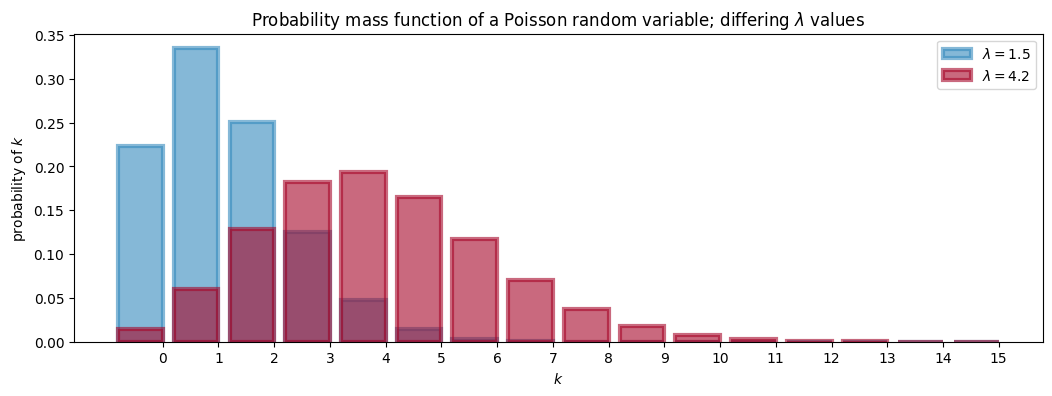

In [22]:
plt.figure(figsize=(12.5, 4))

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628",]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw=3)  # Corrected lw argument

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw=3)  # Corrected lw argument

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing $\lambda$ values")

### Continuous Case
Instead of a probability mass function, a continuous random variable has a *probability density function*. 

An example of continuous random variable is a random variable with **exponential density**. The density function for an exponential random variable looks like this:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

Like a Poisson random variable, an exponential random variable can take on only non-negative values. But unlike a Poisson variable, the exponential can take on *any* non-negative values, including non-integral values such as 4.25 or 5.612401. 

This property makes it a poor choice for count data, which must be an integer, but a great choice for time data, temperature data, or any other *precise and positive* variables. The graph below shows two probability density functions with different $\lambda$ values. 

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

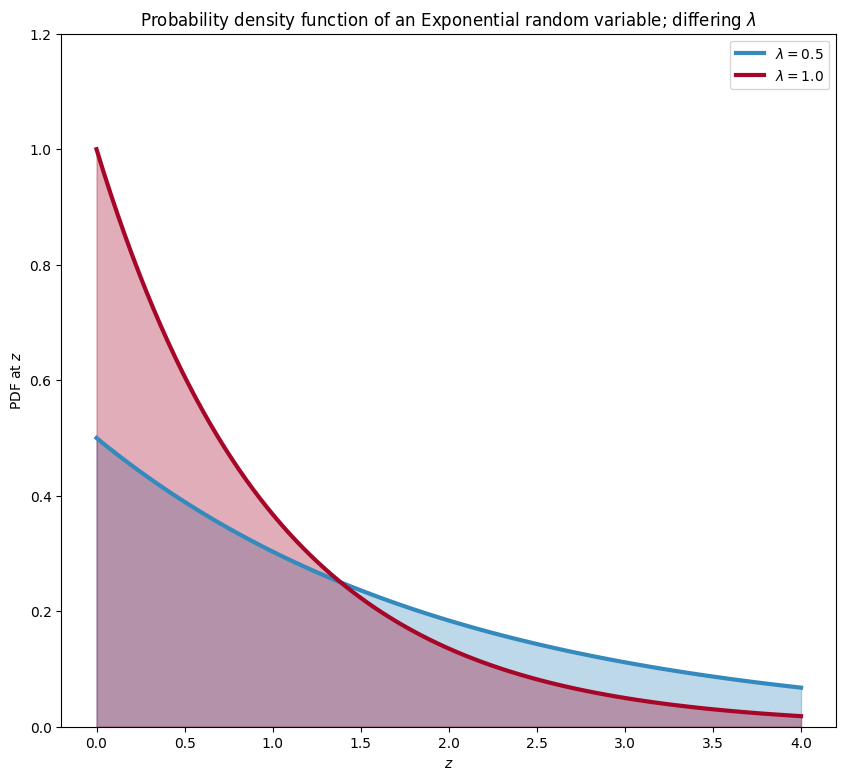

In [23]:
#@title
a = np.linspace(0, 4, 100)
expo = stats.expon

mean = [0.5, 1]

for l, c in zip(mean, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

### But what is $\lambda \;$?

**This question is what motivates statistics**. In the real world, $\lambda$ is hidden from us. 

We see only $Z$, and must go backwards to try and determine $\lambda$. The problem is difficult because there is no one-to-one mapping from $Z$ to $\lambda$. Many different methods have been created to solve the problem of estimating $\lambda$, but since $\lambda$ is never actually observed, no one can say for certain which method is best! 

Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is likely to be by assigning a probability distribution to $\lambda$.

## 6. Probabilistic Programming

Probabilistic programming  allows for flexible specification and fitting of Bayesian statistical models. 

PyMC3 is a new, open-source PP framework with an intuitive and readable, yet powerful, syntax that is close to the natural syntax statisticians use to describe models.

In [24]:
#!apt-get install python3.5

In [25]:
#!pip install pymc3
#!pip install patsy
import pymc as pm  
import numpy as np  
import pandas as pd


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


To introduce model definition, fitting and posterior analysis, we first consider a simple **Bayesian linear regression model** with normal priors on the parameters. 

We are interestedin predicting outcomes $Y$ as normally-distributed observations with $\mu$ that is a linear function of two predictor variables, $X_1$ and $X_2$:

$$ Y \sim \mathcal N (\mu, \sigma^2)$$
$$ \mu = \alpha + \beta_1 X_1 + \beta_2 X_2 $$

We will apply zero-mean normal priors with variance of 10 to both regression coefficients, which corresponds to weak information regarding the true parameter values. 

Since variances must be positive, we will also choose a half-normal distribution (normal distribution bounded below at zero) as the prior for $\sigma$:

$$ \alpha \sim \mathcal N(0,10)$$
$$ \beta_i \sim \mathcal N(0,10)$$
$$ \sigma \sim \mathcal |N(0,10)|$$



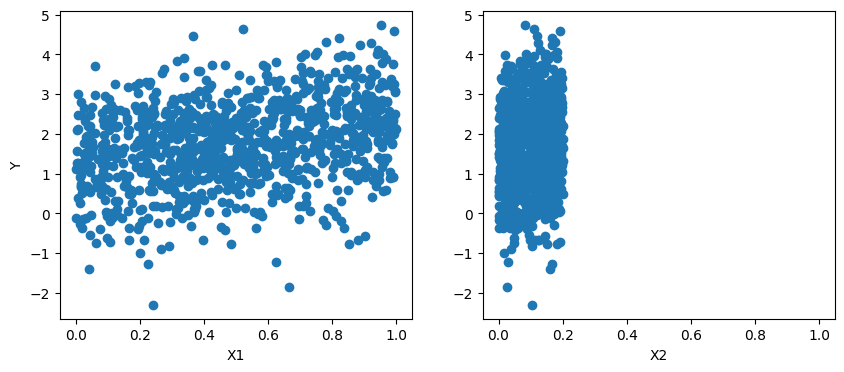

In [26]:
# generating data

# Intialize random number generator
from numpy import random
np.random.seed(123)

# True parameter values

alpha, sigma = 1, 1
beta = [1, 2.5]
size = 1000
X1 = random.rand(size)
X2 = random.rand(size)/5.0

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

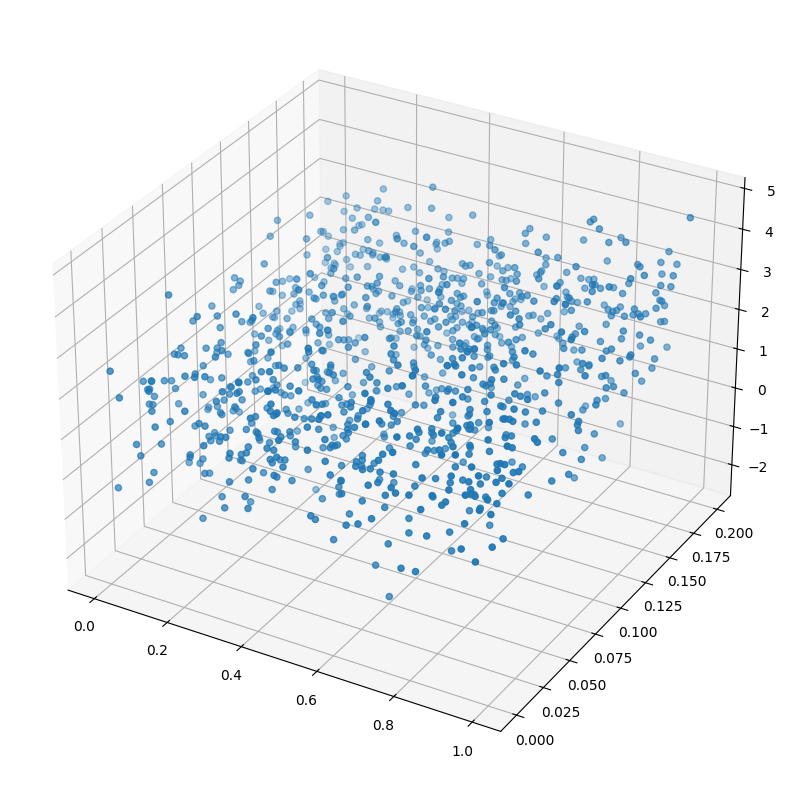

In [27]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1,X2,Y) # plot the point (2,3,4) on the figure

plt.show()


### 6.1 Model specification

Specifying this model in PyMC3 is straightforward because the syntax is as close to the statistical notation.

In [28]:
from pymc import Model, Normal, HalfNormal

# container for the model random variables
basic_model = Model()

# all PyMC3 objects introduced in the indented 
# code block below the with statement are added to the model behind the scenes
with basic_model:
    
    # Priors (stochastic random variables) for unknown model parameters
    alpha = Normal('alpha', mu=0, sigma=10)
    beta = Normal('beta', mu=0, sigma=10, shape=2)
    sigma = HalfNormal('sigma', sigma=1)
    
    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

### 6.2 Model fitting

Having completely specified our model, the next step is to obtain **posterior estimates for the unknown variables in the model**. 

**Ideally, we could calculate the posterior estimates analytically, but for most non-trivial models, this is not feasible.**

We will consider two approaches, whose appropriateness depends on the structure of the model and the goals of the analysis: 
+ finding the maximum a posteriori (MAP) point using optimization methods, and 
Maximum a posteriori method+ computing summaries based on samples drawn from the posterior distribution using Markov Chain Monte Carlo (MCMC) sampling methods.

In [29]:
# Maximum a posteriori method (maximum of the log-posterior)

from pymc import find_MAP

map_estimate = find_MAP(model=basic_model)
print(map_estimate)

Output()

{'alpha': array(0.88039948), 'beta': array([1.13802876, 3.07242318]), 'sigma_log__': array(-0.01698173), 'sigma': array(0.98316164)}


PyMC3 has the standard sampling algorithms like adaptive Metropolis-Hastings and adaptive slice sampling, but PyMC3's most capable step method is the No-U-Turn Sampler. 

NUTS is especially useful on models that have many continuous parameters,

In [30]:
# sampling method

from pymc import sample

with basic_model:
    
    # obtain starting values via MAP
    start = find_MAP(model=basic_model)
    
    # draw 2000 posterior samples
    trace = sample(2000, start=start)

Output()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


The sample function runs the `step` method(s) assigned (or passed) to it for the given number of iterations and returns a `Trace` object containing the samples collected, in the order they were collected. 

The trace object can be queried in a similar way to a dict containing a map from variable names to numpy.arrays.

In [31]:
trace['posterior']['alpha'][-5:]

<xarray.DataArray 'alpha' (chain: 4, draw: 2000)> Size: 64kB
array([[0.83999945, 0.83627591, 0.84790857, ..., 0.7683444 , 0.85486101,
        0.95234584],
       [0.91483239, 0.87265443, 0.84136266, ..., 0.97044568, 0.86422691,
        0.88637556],
       [0.81053621, 0.85713974, 0.88817672, ..., 0.97903998, 0.83588129,
        0.70727703],
       [0.94236747, 0.87338347, 0.95452566, ..., 0.93232159, 0.89801621,
        0.84582314]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 16kB 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999

### 6.3 Posterior analysis

PyMC3 provides plotting and summarization functions for inspecting the sampling output. A simple posterior plot can be created using `traceplot`.

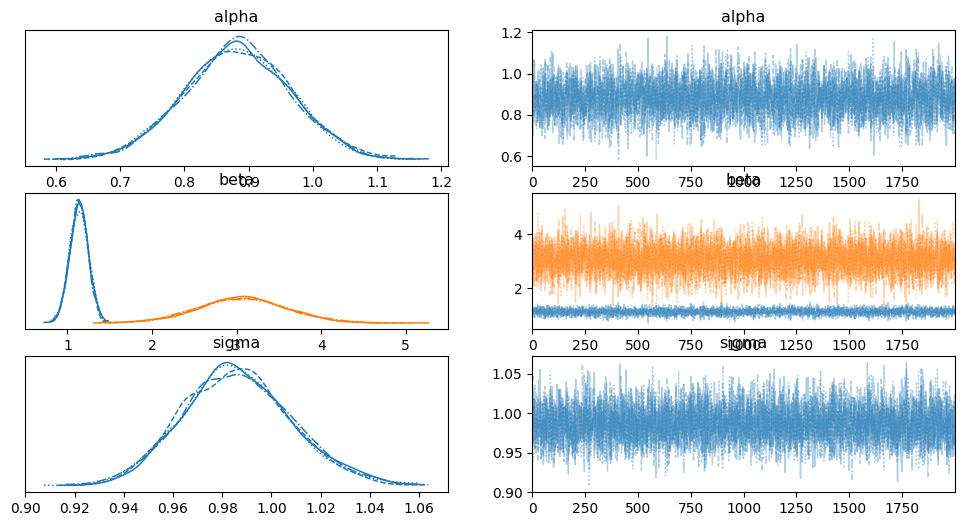

In [32]:
from pymc import plot_trace

plot_trace(trace);

In [33]:
from pymc import summary

summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.882,0.083,0.726,1.036,0.001,0.001,3672.0,4454.0,1.0
beta[0],1.137,0.108,0.934,1.341,0.002,0.001,4481.0,4842.0,1.0
beta[1],3.068,0.519,2.115,4.060,0.007,0.005,4947.0,5085.0,1.0
sigma,0.986,0.022,0.945,1.029,0.000,0.000,5531.0,4188.0,1.0


## Example: Inferring behaviour from text-message data.

> You are given a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's text-messaging habits have changed over time, either gradually or suddenly. How can you model this? (This is in fact my own text-message data. Judge my popularity as you wish.)


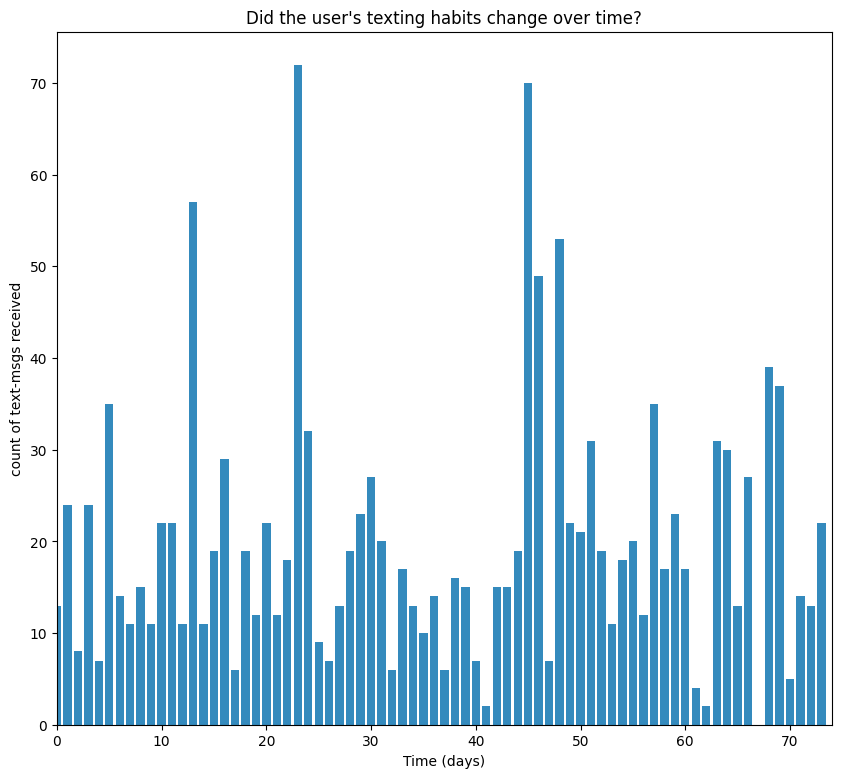

In [34]:

file = open('txtdata.csv', 'r')

count_data = np.loadtxt(file)
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [lambda_1]
>Metropolis: [lambda_2]
>Metropolis: [tau]


Output()

Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 3 seconds.


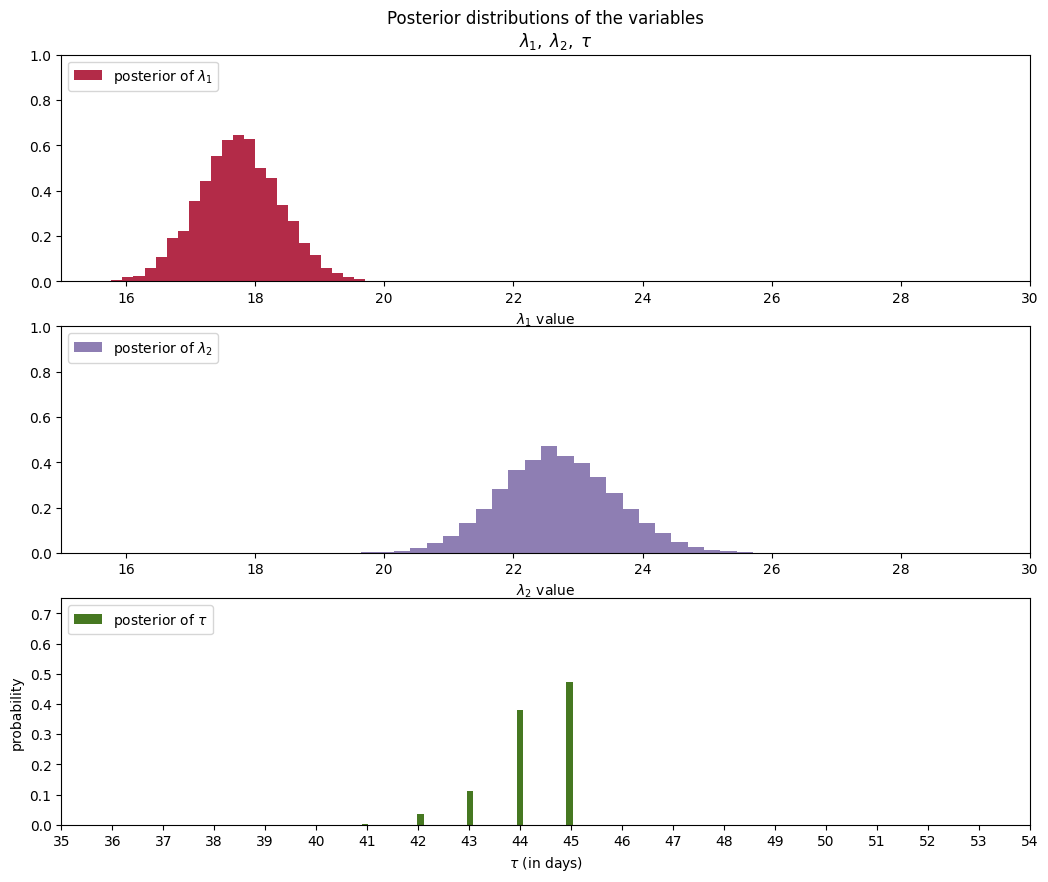

In [35]:
import pymc as pm

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
                                   
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step, return_inferencedata=False)

lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

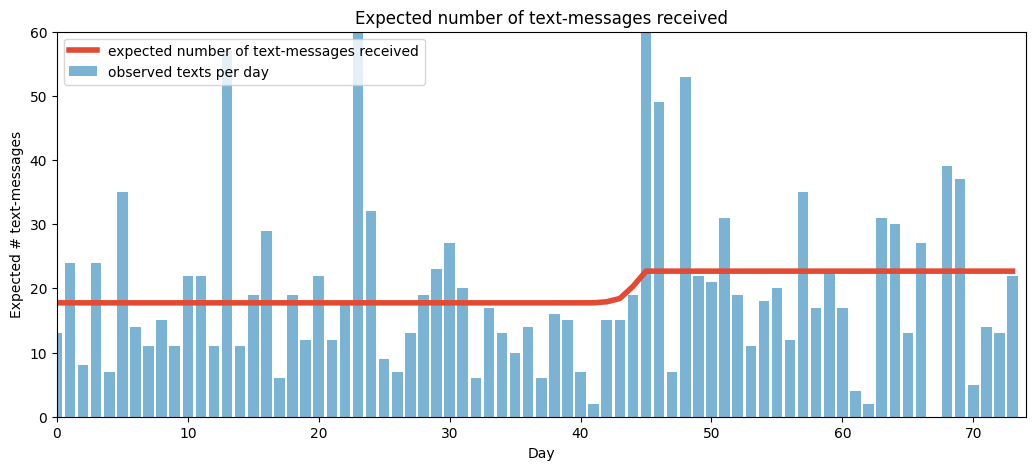

In [36]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

More information: [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

